<a href="https://colab.research.google.com/github/pythonuzgit/elmurodov/blob/master/Computer%20Vision/Lake_water_and_river_water_image_classification_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install arrow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 1.4 MB/s eta 0:00:00


Import Libraries

In [7]:
from pathlib import Path
from random import choice
from random import seed
seed(2023)

Create dataset

In [8]:
data = Path('/content/River vs Lake')
files = list(data.glob('**/*.jpg'))
lake_files = list(data.glob('lake water/*.jpg'))
river_files = list(data.glob('river water/*.jpg'))
for _ in range(5):
    print(choice(files))

/content/River vs Lake/river water/Image_34.jpg
/content/River vs Lake/river water/Image_37.jpg
/content/River vs Lake/river water/Image_57.jpg
/content/River vs Lake/lake water/Image_18.jpg
/content/River vs Lake/river water/Image_70.jpg


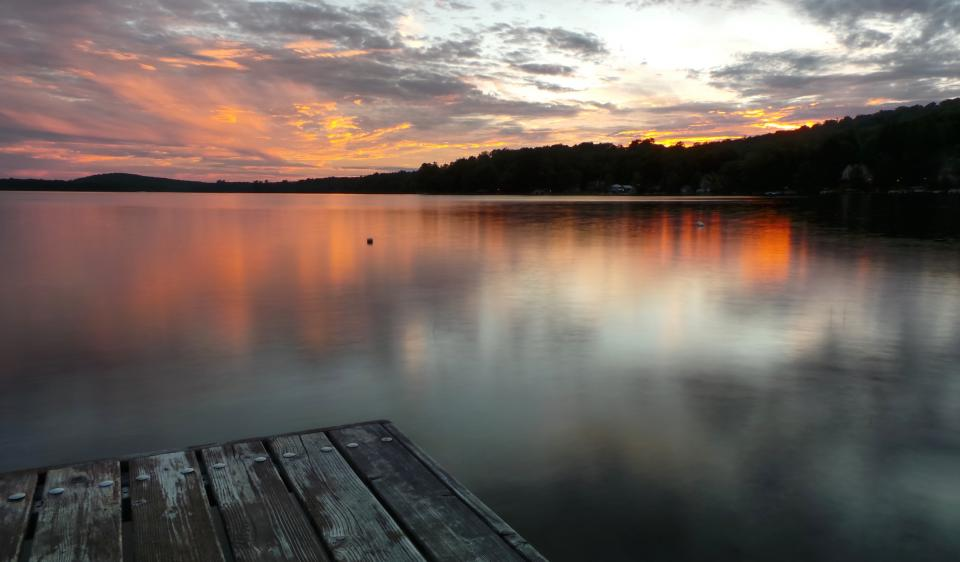

In [14]:
from PIL import Image
Image.open(mode='r', fp=str(choice(lake_files)))

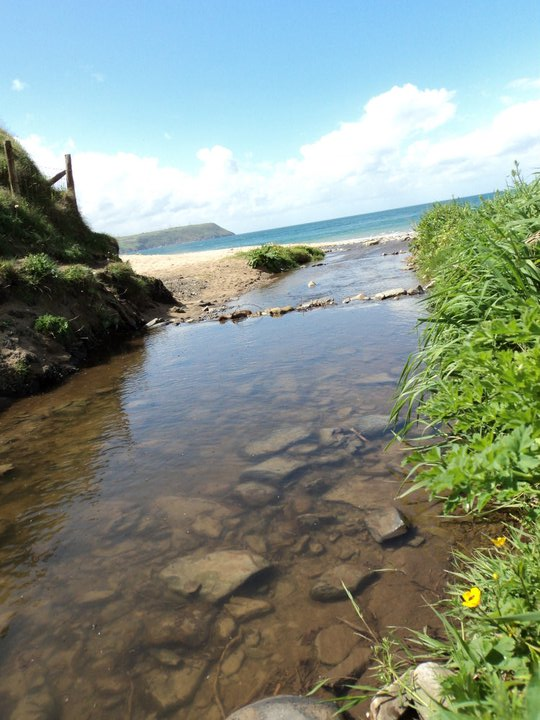

In [13]:
Image.open(mode='r', fp=str(choice(river_files)))

In [16]:
from arrow import now
from cv2 import imread
from cv2 import resize
from numpy import array

In [17]:
load_start = now()
waters = {'lake water': list(data.glob('lake water/*.*')), 'river water': list(data.glob('river water/*.*')),}
labels = {'lake water': 0, 'river water': 1}


X = []
Y = []
missing_image_count = 0
success_files = []
for name, file_list in waters.items():
    dog_or_cat = labels[name]
    for filename in file_list:
        try:
            image = imread(filename=str(filename).strip())
            if image is not None:
                X.append(resize(src=image, dsize=(200, 200)))
                Y.append(dog_or_cat)
                success_files.append(filename)
            else:
                missing_image_count += 1
        except Exception as e:
            pass




In [18]:
print('array lengths: X: {} Y: {}'.format(len(X), len(Y)))

array lengths: X: 190 Y: 190


In [19]:
X = array(X)
Y = array(Y)

In [20]:
print('X shape: {}'.format(X.shape))

X shape: (190, 200, 200, 3)


In [21]:
print('missing {} images'.format(missing_image_count))

missing 0 images


In [22]:
print('data load time: {}'.format(now() - load_start))

data load time: 0:00:27.668168


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=True, test_size=0.2, random_state=2023, stratify=Y)

Train the model

In [24]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import Sequential
from tensorflow.keras.regularizers import l2

In [25]:
EPOCHS = 12

model_start = now()
model = Sequential([
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(200, 200, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu', kernel_regularizer=l2(0.05)),
    layers.Dense(1, activation='sigmoid'),
])
model.compile(
    loss = 'binary_crossentropy',
    metrics=['accuracy', 'binary_accuracy'],
    optimizer='adam',
)


fit_history = model.fit(x=X_train, y=y_train, epochs=EPOCHS)
evaluate_result = model.evaluate(x=X_test, y=y_test, batch_size=None, verbose='auto', sample_weight=None, steps=None, callbacks=None,
                                 max_queue_size=10, workers=1, use_multiprocessing=False, return_dict=True,)
print(evaluate_result)
print('model time: {}'.format(now() - model_start))

Epoch 1/12
5/5 [==============================] - 13s 2s/step - loss: 934.1790 - accuracy: 0.5855 - binary_accuracy: 0.5855
Epoch 2/12
5/5 [==============================] - 11s 2s/step - loss: 104.3419 - accuracy: 0.4671 - binary_accuracy: 0.4671
Epoch 3/12
5/5 [==============================] - 9s 2s/step - loss: 18.1320 - accuracy: 0.5132 - binary_accuracy: 0.5132
Epoch 4/12
5/5 [==============================] - 11s 2s/step - loss: 10.3815 - accuracy: 0.6250 - binary_accuracy: 0.6250
Epoch 5/12
5/5 [==============================] - 11s 2s/step - loss: 10.9984 - accuracy: 0.7105 - binary_accuracy: 0.7105
Epoch 6/12
5/5 [==============================] - 9s 2s/step - loss: 10.9320 - accuracy: 0.8882 - binary_accuracy: 0.8882
Epoch 7/12
5/5 [==============================] - 11s 2s/step - loss: 10.9116 - accuracy: 0.9276 - binary_accuracy: 0.9276
Epoch 8/12
5/5 [==============================] - 11s 2s/step - loss: 10.7312 - accuracy: 0.9868 - binary_accuracy: 0.9868
Epoch 9/12
5/5 [

<Axes: >

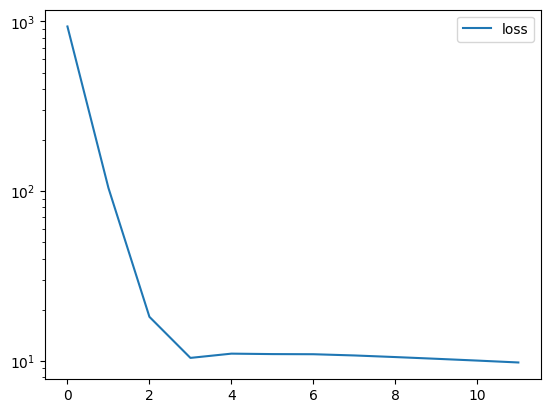

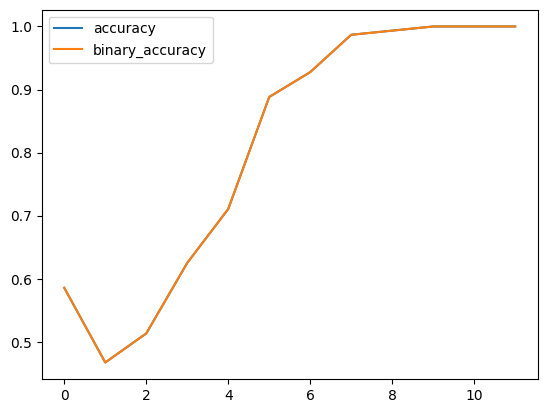

In [26]:
import pandas as pd
history_df = pd.DataFrame(fit_history.history)
history_df.loc[:, ['loss', ]].plot(logy=True)
history_df.loc[:, ['accuracy', 'binary_accuracy']].plot()

In [38]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 1s 96ms/step - loss: 10.7329 - accuracy: 0.6316 - binary_accuracy: 0.6316


[10.732946395874023, 0.6315789222717285, 0.6315789222717285]